 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Filippo Boni<br>
**ID Number**: 2057137


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
IDnumber =28 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_test needs to be the number of samples in the test set
m_training = int((0.75)*(m))

# m_test needs to be the number of samples in the test set
m_test = int((0.25)*(m))

# X_training = instances for training set
X_training = X[0:(m_training)]
#Y_training = labels for the training set
Y_training = Y[0:(m_training)]

# X_test = instances for test set
X_test = X[m_training:m]
# Y_test = labels for the test set
Y_test = Y[m_training:m]


print(Y_training) # to make sure that Y_training contains both 1 and -1
print(m_test)


print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))
print("\nNumber of classical instances in training:", np.sum(Y_training==-1))
print("Number of metal instances in training:", np.sum(Y_training==1))


print("Shape of training set: " + str(X_training.shape))
print("Shape of label training set: " + str(Y_training.shape))
print("Shape of test set: " + str(X_test.shape))
print("Shape of label test set: " + str(Y_test.shape))



[-1 -1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1  1  1
 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1  1
 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1 -1
 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1
 -1  1 -1 -1  1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1
  1 -1 -1  1  1  1]
50

Number of classical instances in test: 25
Number of metal instances in test: 25

Number of classical instances in training: 75
Number of metal instances in training: 75
Shape of training set: (150, 3)
Shape of label training set: (150,)
Shape of test set: (50, 3)
Shape of label test set: (50,)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
X_training_h = np.hstack((np.ones((m_training,1)),X_training))
print(X_training[2])
X_test_h = np.hstack((np.ones((m_test,1)),X_test))



print("Training set in homogeneous coordinates:")
print(X_training_h[:10])

[8.91029095e+01 4.26884734e-01 2.14160877e+03]
Training set in homogeneous coordinates:
[[1.00000000e+00 2.15332031e+02 3.04577593e-01 1.46548189e+03]
 [1.00000000e+00 1.17453835e+02 2.44665823e-01 8.52912297e+02]
 [1.00000000e+00 8.91029095e+01 4.26884734e-01 2.14160877e+03]
 [1.00000000e+00 1.35999178e+02 2.66760217e-01 1.37128357e+03]
 [1.00000000e+00 1.03359375e+02 2.94134905e-01 1.30266245e+03]
 [1.00000000e+00 1.17453835e+02 4.14578447e-01 2.74299079e+03]
 [1.00000000e+00 1.23046875e+02 4.40829184e-01 2.95527209e+03]
 [1.00000000e+00 9.57031250e+01 4.38488566e-01 2.68341629e+03]
 [1.00000000e+00 1.07666016e+02 2.53792937e-01 1.75127142e+03]
 [1.00000000e+00 6.15234375e+01 4.29974584e-01 2.38938800e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
# A template is provided, but feel free to build a different implementation

def perceptron_update(current_w, x, y):
    # Place in this function the update rule of the perceptron algorithm
    new_w=current_w+x*y
    
    return new_w

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros((4,))
    best_w = np.zeros((4,))
    num_samples = len(X)
    best_error = 0
    arr_misclassified=[]
    
    index_misclassified = -1 #will be ovewritten
    num_misclassified = 0 #will be ovewritten
    
    for i in range(num_samples):
            
        if np.dot(curr_w,X[i,:])*Y[i]<=0:
            num_misclassified=num_misclassified+1
    
    
    for i in range(num_samples):
            
        if np.dot(curr_w,X[i,:])*Y[i]<=0:
            x=np.append(X[i],Y[i])
            index_misclassified=i
            break
     
    
    if len(x)==0:
        index_misclassified=-1
        

    
    best_error=num_misclassified/len(X)   
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        
        arr_misclassified.append(num_misclassified)
        
        index_misclassified = -1
        num_misclassified = 0
        
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        
        #call update function using a misclassifed sample
        
        curr_w=perceptron_update(curr_w,x[:-1], x[-1])
        
        # store the number of randomly classified samples and the index of at least one of them
        
        for i in range(num_samples):
            
            if np.dot(curr_w,X[i,:])*Y[i]<=0:
                num_misclassified=num_misclassified+1
                
        
        if (num_misclassified/len(X))<best_error:
            
            best_error=num_misclassified/len(X)
            best_w=curr_w
            best_iter=num_iter
            
            
        permutation = np.random.permutation(num_samples)  
        X = X[permutation]
        Y = Y[permutation]
        
        x=np.empty(shape=(5,))
        
        #check if the i-th randomly selected sample is misclassified
        
        for i in range(num_samples):
            
            if np.dot(curr_w,X[i,:])*Y[i]<=0:
                x=np.append(X[i],Y[i])
                index_misclassified=i
                break
        

        #update  error count, keep track of best solution
        
        print(f'num iter:{num_iter}, num_misclassified:{num_misclassified}, curr_w:{curr_w}')
        print(f'best_error:{best_error}, best_w:{best_w}, \n')
    
        num_iter += 1
        
        
    
    best_error = best_error
    
    print(f'best_num_mis:{best_error}, best iter:{best_iter}, best w:{best_w}')
    
    return best_w, best_error, arr_misclassified, num_iter

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations
w_found, error, arr_mis_100, n = perceptron(X_training_h,Y_training, 100)

print('\n')
print("Training Error of perpceptron (100 iterations): " + str(error))

num iter:1, num_misclassified:75, curr_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:2, num_misclassified:75, curr_w:[ 0.00000000e+00 -7.93328536e+01  6.52943570e-02  7.52944136e+02]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:3, num_misclassified:75, curr_w:[-1.00000000e+00 -2.02379729e+02 -1.41868904e-01 -7.58103062e+01]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:4, num_misclassified:75, curr_w:[ 0.00000000e+00 -4.08807052e+01  3.55217248e-01  2.77225837e+03]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:5, num_misclassified:75, curr_w:[-1.00000000e+00 -1.48546721e+02  4.55644940e-02  1.24663908e+03]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num i

num iter:66, num_misclassified:75, curr_w:[-1.80000000e+01 -2.42081842e+03  3.32981682e-01  6.84618038e+02]
best_error:0.10666666666666667, best_w:[-1.50000000e+01 -1.83168490e+03  2.01444445e-01  1.17005738e+02], 

num iter:67, num_misclassified:75, curr_w:[-1.90000000e+01 -2.52848444e+03  5.66893562e-02 -5.26581914e+02]
best_error:0.10666666666666667, best_w:[-1.50000000e+01 -1.83168490e+03  2.01444445e-01  1.17005738e+02], 

num iter:68, num_misclassified:75, curr_w:[-1.80000000e+01 -2.39928522e+03  5.44342902e-01  2.19197603e+03]
best_error:0.10666666666666667, best_w:[-1.50000000e+01 -1.83168490e+03  2.01444445e-01  1.17005738e+02], 

num iter:69, num_misclassified:75, curr_w:[-1.90000000e+01 -2.52848444e+03  3.28014540e-01  9.80679692e+02]
best_error:0.10666666666666667, best_w:[-1.50000000e+01 -1.83168490e+03  2.01444445e-01  1.17005738e+02], 

num iter:70, num_misclassified:75, curr_w:[-2.00000000e+01 -2.71305475e+03  9.17352247e-02 -1.95096658e+02]
best_error:0.106666666666666

**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dat
print(w_found)
num_errors = 0

for i in range(X_test_h.shape[0]):
    if (np.dot(w_found,X_test_h[i,:])*Y_test[i] < 0):
        num_errors += 1 
        
        
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

[-1.50000000e+01 -1.83168490e+03  2.01444445e-01  1.17005738e+02]
Test Error of perpceptron (100 iterations): 0.16


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

The training error is 0.10666666666666667 so the percepton gives the wright solution in more or less the 90% of the cases in the training set.  In the test set the error is instead 0.16. So the test error is higher of the training error that means that with these parameters the number of misclassified samples (related to the dimension of the dataset) in the test set is higher than the one in the training set. This is what we normaly expect from any algorithm because by definition it tries to find the best parameters for the training set and the test set is a way to verify how general the solution found is. 

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 4000 iterations here!

w_found, error, arr_mis_4000, n = perceptron(X_training_h,Y_training, 4000)

print('\n')
print("Training Error of perpceptron (4000 iterations): " + str(error))
print('\n')

num_errors = 0

for i in range(X_test_h.shape[0]):
    if (np.dot(w_found,X_test_h[i,:])*Y_test[i] < 0):
        num_errors += 1 
        
        
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

num iter:1, num_misclassified:75, curr_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:2, num_misclassified:75, curr_w:[ 0.00000000e+00 -7.93328536e+01  1.60899940e-01  9.19192397e+02]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:3, num_misclassified:75, curr_w:[-1.00000000e+00 -1.86998869e+02 -7.83824557e-02 -3.62578449e+02]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:4, num_misclassified:75, curr_w:[ 0.00000000e+00 -6.39519942e+01  3.55865320e-01  2.26640934e+03]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num iter:5, num_misclassified:75, curr_w:[-1.00000000e+00 -1.81405829e+02  7.75164039e-02  1.02269132e+03]
best_error:0.5, best_w:[-1.00000000e+00 -2.15332031e+02 -3.04577593e-01 -1.46548189e+03], 

num i

num iter:59, num_misclassified:75, curr_w:[-1.70000000e+01 -1.77558115e+03 -1.99931122e-01  2.01874256e+03]
best_error:0.4266666666666667, best_w:[-2.00000000e+00 -2.77108954e+02 -1.89639451e-01  3.90049343e+01], 

num iter:60, num_misclassified:75, curr_w:[-1.80000000e+01 -1.90478037e+03 -4.16259483e-01  8.07446223e+02]
best_error:0.4266666666666667, best_w:[-2.00000000e+00 -2.77108954e+02 -1.89639451e-01  3.90049343e+01], 

num iter:61, num_misclassified:23, curr_w:[-1.90000000e+01 -2.00048350e+03 -6.43034275e-01  1.17370321e+02]
best_error:0.15333333333333332, best_w:[-1.90000000e+01 -2.00048350e+03 -6.43034275e-01  1.17370321e+02], 

num iter:62, num_misclassified:75, curr_w:[-2.00000000e+01 -2.10384287e+03 -9.54621148e-01 -2.10749984e+03]
best_error:0.15333333333333332, best_w:[-1.90000000e+01 -2.00048350e+03 -6.43034275e-01  1.17370321e+02], 

num iter:63, num_misclassified:75, curr_w:[-1.90000000e+01 -1.91927256e+03 -4.12774029e-01  9.40891652e+02]
best_error:0.15333333333333332

num iter:104, num_misclassified:75, curr_w:[-3.20000000e+01 -3.79109873e+03 -1.14349907e+00  1.64360254e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:105, num_misclassified:23, curr_w:[-3.30000000e+01 -3.90855257e+03 -1.42629650e+00  2.28523332e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:106, num_misclassified:75, curr_w:[-3.20000000e+01 -3.72398226e+03 -8.84449381e-01  3.27691483e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:107, num_misclassified:75, curr_w:[-3.30000000e+01 -3.81968538e+03 -1.20391750e+00  1.56446875e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:108, num_misclassified:21, curr_w:[-3.40000000e+01 -3.98118441e+03 -1.44956308e+00  2.85867664e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02

num iter:149, num_misclassified:75, curr_w:[-4.50000000e+01 -5.53905786e+03 -9.03265622e-01  1.44842833e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:150, num_misclassified:75, curr_w:[-4.60000000e+01 -5.70055689e+03 -1.17408048e+00 -1.85106433e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:151, num_misclassified:75, curr_w:[-4.50000000e+01 -5.55700220e+03 -7.12575969e-01  2.27426512e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:152, num_misclassified:69, curr_w:[-4.60000000e+01 -5.67445603e+03 -9.63162421e-01  8.77573882e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:153, num_misclassified:75, curr_w:[-4.70000000e+01 -5.77015916e+03 -1.17897510e+00 -1.29476706e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02

num iter:206, num_misclassified:70, curr_w:[-6.20000000e+01 -7.65599381e+03 -6.34493902e-01  2.44492162e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:207, num_misclassified:75, curr_w:[-6.10000000e+01 -7.53294694e+03 -1.50999623e-01  2.96810726e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:208, num_misclassified:75, curr_w:[-6.20000000e+01 -7.67650163e+03 -4.18353017e-01  1.84987975e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:209, num_misclassified:49, curr_w:[-6.30000000e+01 -7.84876725e+03 -7.14899787e-01  3.34317665e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:210, num_misclassified:75, curr_w:[-6.20000000e+01 -7.68726823e+03 -2.04007221e-01  3.03429929e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02

num iter:276, num_misclassified:60, curr_w:[-8.20000000e+01 -1.01131395e+04 -3.21706118e-01  1.32699709e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:277, num_misclassified:75, curr_w:[-8.30000000e+01 -1.02208055e+04 -6.31358872e-01 -1.98622205e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:278, num_misclassified:75, curr_w:[-8.20000000e+01 -1.00977587e+04 -1.47864593e-01  2.52499289e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:279, num_misclassified:60, curr_w:[-8.30000000e+01 -1.02269579e+04 -4.45207042e-01  1.34091250e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:280, num_misclassified:75, curr_w:[-8.40000000e+01 -1.03303172e+04 -7.56793915e-01 -8.83957661e+02]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02

num iter:319, num_misclassified:75, curr_w:[-9.30000000e+01 -1.10920057e+04  7.37401741e-02  3.04451015e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:320, num_misclassified:60, curr_w:[-9.40000000e+01 -1.12280048e+04 -1.73195187e-01  1.48569620e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:321, num_misclassified:75, curr_w:[-9.50000000e+01 -1.13640040e+04 -5.54589433e-01 -4.19336184e+01]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:322, num_misclassified:75, curr_w:[-9.40000000e+01 -1.12563380e+04 -7.75314318e-02  2.84746870e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02], 

num iter:323, num_misclassified:69, curr_w:[-9.50000000e+01 -1.13346406e+04 -2.64095179e-01  1.76801972e+03]
best_error:0.1, best_w:[-2.30000000e+01 -2.57462358e+03 -9.68388338e-01  1.61714619e+02

num iter:401, num_misclassified:75, curr_w:[-1.15000000e+02 -1.35204263e+04  7.48724353e-01 -9.13974633e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:402, num_misclassified:48, curr_w:[-1.14000000e+02 -1.33912271e+04  1.22349045e+00  1.48438867e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:403, num_misclassified:75, curr_w:[-1.15000000e+02 -1.35527261e+04  9.52675594e-01 -1.49146093e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:404, num_misclassified:75, curr_w:[-1.14000000e+02 -1.34296792e+04  1.39350478e+00  2.80612600e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:405, num_misclassified:42, curr_w:[-1.15000000e+02 -1.35290633e+04  1.11563955e+00  1.31609119e+03]
best_error:0.0933333333

num iter:442, num_misclassified:51, curr_w:[-1.24000000e+02 -1.44805133e+04  2.23844632e+00  1.66987296e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:443, num_misclassified:75, curr_w:[-1.25000000e+02 -1.46035602e+04  1.93320195e+00 -1.33748798e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:444, num_misclassified:73, curr_w:[-1.24000000e+02 -1.44420612e+04  2.43028810e+00  2.71431988e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:445, num_misclassified:62, curr_w:[-1.25000000e+02 -1.45377643e+04  2.20351331e+00  2.02424398e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:446, num_misclassified:48, curr_w:[-1.26000000e+02 -1.46669635e+04  1.97139918e+00  6.36208982e+02]
best_error:0.0933333333

num iter:517, num_misclassified:73, curr_w:[-1.43000000e+02 -1.63231700e+04  3.45955862e+00  3.13059731e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:518, num_misclassified:48, curr_w:[-1.44000000e+02 -1.64846690e+04  3.19661143e+00  1.81689842e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:519, num_misclassified:75, curr_w:[-1.45000000e+02 -1.65803721e+04  2.87714331e+00  1.04452341e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:520, num_misclassified:73, curr_w:[-1.44000000e+02 -1.64573253e+04  3.31797250e+00  3.05972444e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:521, num_misclassified:47, curr_w:[-1.45000000e+02 -1.66093243e+04  3.02356235e+00  1.78068277e+03]
best_error:0.0933333333

num iter:567, num_misclassified:24, curr_w:[-1.55000000e+02 -1.76794599e+04  4.24338552e+00  1.37832453e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:568, num_misclassified:75, curr_w:[-1.56000000e+02 -1.77871259e+04  3.98959258e+00 -3.72946884e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:569, num_misclassified:60, curr_w:[-1.55000000e+02 -1.76794599e+04  4.57056638e+00  2.28331430e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:570, num_misclassified:48, curr_w:[-1.56000000e+02 -1.77788439e+04  4.29270115e+00  7.93279492e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:571, num_misclassified:74, curr_w:[-1.55000000e+02 -1.76557970e+04  4.72694893e+00  3.42226728e+03]
best_error:0.0933333333

num iter:640, num_misclassified:31, curr_w:[-1.74000000e+02 -1.92939534e+04  5.17953896e+00  1.64529570e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:641, num_misclassified:73, curr_w:[-1.75000000e+02 -1.93722559e+04  4.99297521e+00  5.65846716e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:642, num_misclassified:73, curr_w:[-1.74000000e+02 -1.92492091e+04  5.43380439e+00  3.52111881e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:643, num_misclassified:47, curr_w:[-1.75000000e+02 -1.93449122e+04  5.18141332e+00  2.01581980e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:644, num_misclassified:75, curr_w:[-1.76000000e+02 -1.94679591e+04  4.87616894e+00  2.12198043e+02]
best_error:0.0933333333

num iter:685, num_misclassified:44, curr_w:[-1.87000000e+02 -2.06986176e+04  5.14257951e+00  9.60050327e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:686, num_misclassified:71, curr_w:[-1.86000000e+02 -2.05755707e+04  5.65578590e+00  3.33838608e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:687, num_misclassified:47, curr_w:[-1.87000000e+02 -2.07370697e+04  5.41670703e+00  2.18049622e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:688, num_misclassified:48, curr_w:[-1.88000000e+02 -2.08447357e+04  5.17742463e+00  8.98725372e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:689, num_misclassified:73, curr_w:[-1.87000000e+02 -2.07155365e+04  5.66197059e+00  3.76996101e+03]
best_error:0.0933333333

num iter:759, num_misclassified:71, curr_w:[-2.03000000e+02 -2.23574290e+04  7.44070902e+00  3.57451421e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:760, num_misclassified:48, curr_w:[-2.04000000e+02 -2.24357316e+04  7.25414527e+00  2.49506523e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:761, num_misclassified:31, curr_w:[-2.05000000e+02 -2.25390909e+04  6.96001037e+00  1.19240277e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:762, num_misclassified:64, curr_w:[-2.04000000e+02 -2.24216371e+04  7.38158146e+00  3.18052315e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:763, num_misclassified:16, curr_w:[-2.05000000e+02 -2.25831361e+04  7.15841066e+00  1.47481854e+03]
best_error:0.0933333333

num iter:797, num_misclassified:60, curr_w:[-2.13000000e+02 -2.33877990e+04  7.78937578e+00  3.08927517e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:798, num_misclassified:20, curr_w:[-2.14000000e+02 -2.35313537e+04  7.52079421e+00  1.65784761e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:799, num_misclassified:75, curr_w:[-2.15000000e+02 -2.36347131e+04  7.27577912e+00  1.60650971e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:800, num_misclassified:57, curr_w:[-2.14000000e+02 -2.35424279e+04  7.77783444e+00  2.90404378e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:801, num_misclassified:22, curr_w:[-2.15000000e+02 -2.36381311e+04  7.52544337e+00  1.39874477e+03]
best_error:0.0933333333

num iter:873, num_misclassified:67, curr_w:[-2.31000000e+02 -2.48003510e+04  9.21380784e+00  3.69653793e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:874, num_misclassified:43, curr_w:[-2.32000000e+02 -2.49178049e+04  8.93545892e+00  2.45281991e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:875, num_misclassified:75, curr_w:[-2.33000000e+02 -2.50793039e+04  8.54750971e+00  4.08811899e+01]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:876, num_misclassified:48, curr_w:[-2.32000000e+02 -2.49178049e+04  8.95443469e+00  2.74838063e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:877, num_misclassified:61, curr_w:[-2.33000000e+02 -2.50408517e+04  8.64919032e+00  9.44758878e+02]
best_error:0.0933333333


num iter:923, num_misclassified:36, curr_w:[-2.41000000e+02 -2.57975905e+04  1.02224159e+01  2.35389703e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:924, num_misclassified:75, curr_w:[-2.42000000e+02 -2.59590895e+04  9.83446672e+00 -5.80416900e+01]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:925, num_misclassified:47, curr_w:[-2.41000000e+02 -2.58070905e+04  1.02753867e+01  2.68307642e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:926, num_misclassified:47, curr_w:[-2.42000000e+02 -2.59430896e+04  1.00206131e+01  1.16645020e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:927, num_misclassified:57, curr_w:[-2.41000000e+02 -2.58307425e+04  1.04688919e+01  3.23511373e+03]
best_error:0.093333333

num iter:1004, num_misclassified:62, curr_w:[-2.60000000e+02 -2.70616853e+04  1.16860621e+01  1.01031590e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1005, num_misclassified:64, curr_w:[-2.59000000e+02 -2.69256861e+04  1.21672376e+01  3.79960104e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1006, num_misclassified:42, curr_w:[-2.60000000e+02 -2.70333521e+04  1.18909453e+01  2.58840109e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1007, num_misclassified:75, curr_w:[-2.61000000e+02 -2.72179224e+04  1.16009665e+01  6.35352557e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1008, num_misclassified:60, curr_w:[-2.60000000e+02 -2.71145630e+04  1.20319733e+01  3.54354941e+03]
best_error:0.09333

num iter:1052, num_misclassified:57, curr_w:[-2.68000000e+02 -2.76744679e+04  1.32021772e+01  3.41825379e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1053, num_misclassified:23, curr_w:[-2.69000000e+02 -2.78359669e+04  1.29579379e+01  2.06245587e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1054, num_misclassified:75, curr_w:[-2.70000000e+02 -2.79058043e+04  1.27212721e+01  7.13039945e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1055, num_misclassified:60, curr_w:[-2.69000000e+02 -2.77981383e+04  1.31847831e+01  3.72385621e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1056, num_misclassified:37, curr_w:[-2.70000000e+02 -2.79155921e+04  1.29673617e+01  2.55213770e+03]
best_error:0.09333

num iter:1140, num_misclassified:75, curr_w:[-2.88000000e+02 -2.87403482e+04  1.56541388e+01  4.58739714e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1141, num_misclassified:60, curr_w:[-2.87000000e+02 -2.86326822e+04  1.61710671e+01  3.86011330e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1142, num_misclassified:28, curr_w:[-2.88000000e+02 -2.87283853e+04  1.58372045e+01  2.33520654e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1143, num_misclassified:75, curr_w:[-2.89000000e+02 -2.88240884e+04  1.55177364e+01  6.22760459e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1144, num_misclassified:23, curr_w:[-2.88000000e+02 -2.86948892e+04  1.59800910e+01  2.14777759e+03]
best_error:0.09333

num iter:1180, num_misclassified:61, curr_w:[-2.96000000e+02 -2.90334980e+04  1.66869075e+01  4.00171180e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1181, num_misclassified:42, curr_w:[-2.97000000e+02 -2.91292011e+04  1.64512495e+01  2.82180315e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1182, num_misclassified:68, curr_w:[-2.98000000e+02 -2.92522480e+04  1.61460052e+01  1.01818139e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1183, num_misclassified:47, curr_w:[-2.97000000e+02 -2.91631451e+04  1.65728899e+01  3.15979016e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1184, num_misclassified:16, curr_w:[-2.98000000e+02 -2.92805989e+04  1.62934693e+01  1.87486839e+03]
best_error:0.09333

num iter:1218, num_misclassified:50, curr_w:[-3.04000000e+02 -2.95575607e+04  1.75594203e+01  3.31777810e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1219, num_misclassified:72, curr_w:[-3.05000000e+02 -2.96569447e+04  1.73421004e+01  8.94385225e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1220, num_misclassified:54, curr_w:[-3.04000000e+02 -2.95612416e+04  1.77805889e+01  3.57780152e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1221, num_misclassified:20, curr_w:[-3.05000000e+02 -2.96646010e+04  1.75355738e+01  2.08060488e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1222, num_misclassified:75, curr_w:[-3.06000000e+02 -2.97876478e+04  1.72303295e+01  2.76983122e+02]
best_error:0.09333

num iter:1278, num_misclassified:28, curr_w:[-3.18000000e+02 -3.06528470e+04  1.82041180e+01  2.52974819e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1279, num_misclassified:43, curr_w:[-3.19000000e+02 -3.07311496e+04  1.80175543e+01  1.45029921e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1280, num_misclassified:51, curr_w:[-3.18000000e+02 -3.06081027e+04  1.84976102e+01  3.48003591e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1281, num_misclassified:16, curr_w:[-3.19000000e+02 -3.06798800e+04  1.82633741e+01  1.95338884e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1282, num_misclassified:75, curr_w:[-3.20000000e+02 -3.07516574e+04  1.80291381e+01  4.26741778e+02]
best_error:0.09333

num iter:1335, num_misclassified:60, curr_w:[-3.31000000e+02 -3.11526674e+04  1.98451932e+01  4.25387754e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1336, num_misclassified:31, curr_w:[-3.32000000e+02 -3.12886665e+04  1.95982578e+01  2.69506359e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1337, num_misclassified:75, curr_w:[-3.33000000e+02 -3.14246657e+04  1.93051154e+01  7.62205247e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1338, num_misclassified:42, curr_w:[-3.32000000e+02 -3.12886665e+04  1.97741944e+01  3.01648667e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1339, num_misclassified:43, curr_w:[-3.33000000e+02 -3.13604439e+04  1.95399584e+01  1.48983960e+03]
best_error:0.09333

num iter:1412, num_misclassified:51, curr_w:[-3.48000000e+02 -3.23350201e+04  2.11579658e+01  3.74828882e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1413, num_misclassified:23, curr_w:[-3.49000000e+02 -3.24473673e+04  2.09429020e+01  2.38788047e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1414, num_misclassified:75, curr_w:[-3.50000000e+02 -3.25704141e+04  2.06376576e+01  5.84258714e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1415, num_misclassified:47, curr_w:[-3.49000000e+02 -3.24529603e+04  2.10522361e+01  3.32724950e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1416, num_misclassified:67, curr_w:[-3.50000000e+02 -3.25486634e+04  2.08364234e+01  1.15490856e+03]
best_error:0.09333

num iter:1452, num_misclassified:48, curr_w:[-3.58000000e+02 -3.29031050e+04  2.26620682e+01  3.66977034e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1453, num_misclassified:47, curr_w:[-3.59000000e+02 -3.29953901e+04  2.24383299e+01  1.47697225e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1454, num_misclassified:60, curr_w:[-3.58000000e+02 -3.28518355e+04  2.29346984e+01  4.26953100e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1455, num_misclassified:24, curr_w:[-3.59000000e+02 -3.29475386e+04  2.26152302e+01  2.55708493e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1456, num_misclassified:75, curr_w:[-3.60000000e+02 -3.31090376e+04  2.22272810e+01  1.45146209e+02]
best_error:0.09333

num iter:1494, num_misclassified:75, curr_w:[-3.68000000e+02 -3.36026862e+04  2.31744790e+01  3.16690157e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1495, num_misclassified:42, curr_w:[-3.67000000e+02 -3.34506871e+04  2.36513759e+01  3.23952871e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1496, num_misclassified:24, curr_w:[-3.68000000e+02 -3.35681409e+04  2.33719552e+01  1.95460693e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1497, num_misclassified:60, curr_w:[-3.67000000e+02 -3.34245862e+04  2.38334597e+01  4.41397849e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1498, num_misclassified:23, curr_w:[-3.68000000e+02 -3.35605854e+04  2.35403173e+01  2.48112014e+03]
best_error:0.09333

num iter:1544, num_misclassified:73, curr_w:[-3.78000000e+02 -3.40248141e+04  2.47890595e+01  9.87283230e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1545, num_misclassified:47, curr_w:[-3.77000000e+02 -3.39291110e+04  2.52275480e+01  3.67069952e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1546, num_misclassified:15, curr_w:[-3.78000000e+02 -3.40651102e+04  2.48461538e+01  2.14306971e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1547, num_misclassified:75, curr_w:[-3.79000000e+02 -3.41608133e+04  2.45122912e+01  6.18162945e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1548, num_misclassified:43, curr_w:[-3.78000000e+02 -3.40685282e+04  2.50143465e+01  3.36155576e+03]
best_error:0.09333

num iter:1588, num_misclassified:38, curr_w:[-3.86000000e+02 -3.44659271e+04  2.65295953e+01  3.21817811e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1589, num_misclassified:52, curr_w:[-3.87000000e+02 -3.45616303e+04  2.63484342e+01  1.41071693e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1590, num_misclassified:43, curr_w:[-3.86000000e+02 -3.44441764e+04  2.67700053e+01  3.39883730e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1591, num_misclassified:15, curr_w:[-3.87000000e+02 -3.45518424e+04  2.65307229e+01  2.11706646e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1592, num_misclassified:60, curr_w:[-3.86000000e+02 -3.43998434e+04  2.70598535e+01  4.56229330e+03]
best_error:0.09333

num iter:1630, num_misclassified:47, curr_w:[-3.92000000e+02 -3.47137547e+04  2.89883673e+01  3.61371946e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1631, num_misclassified:15, curr_w:[-3.93000000e+02 -3.48131387e+04  2.87105021e+01  2.12368465e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1632, num_misclassified:75, curr_w:[-3.94000000e+02 -3.49088418e+04  2.83910340e+01  4.11238570e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1633, num_misclassified:47, curr_w:[-3.93000000e+02 -3.48131387e+04  2.89077315e+01  3.74997175e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1634, num_misclassified:61, curr_w:[-3.94000000e+02 -3.49125227e+04  2.86904116e+01  1.32657887e+03]
best_error:0.09333

num iter:1682, num_misclassified:42, curr_w:[-4.02000000e+02 -3.49749103e+04  3.10725053e+01  3.35473929e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1683, num_misclassified:25, curr_w:[-4.03000000e+02 -3.50742943e+04  3.07603476e+01  1.99836626e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1684, num_misclassified:47, curr_w:[-4.02000000e+02 -3.49127953e+04  3.12143970e+01  3.73946358e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1685, num_misclassified:61, curr_w:[-4.03000000e+02 -3.50121793e+04  3.09970771e+01  1.31607071e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1686, num_misclassified:47, curr_w:[-4.02000000e+02 -3.49198942e+04  3.13772281e+01  3.63978629e+03]
best_error:0.09333

num iter:1726, num_misclassified:43, curr_w:[-4.12000000e+02 -3.54493722e+04  3.20487684e+01  1.68190549e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1727, num_misclassified:57, curr_w:[-4.11000000e+02 -3.53201730e+04  3.25364219e+01  4.40046343e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1728, num_misclassified:32, curr_w:[-4.12000000e+02 -3.54637277e+04  3.23023362e+01  3.12084885e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1729, num_misclassified:48, curr_w:[-4.13000000e+02 -3.55811815e+04  3.20197494e+01  1.56920171e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1730, num_misclassified:60, curr_w:[-4.12000000e+02 -3.53966112e+04  3.25615965e+01  4.61759320e+03]
best_error:0.09333

num iter:1767, num_misclassified:21, curr_w:[-4.21000000e+02 -3.59480688e+04  3.30858496e+01  2.58850530e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1768, num_misclassified:72, curr_w:[-4.22000000e+02 -3.60437719e+04  3.28334585e+01  1.08320628e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1769, num_misclassified:47, curr_w:[-4.21000000e+02 -3.59002172e+04  3.33298270e+01  3.87576504e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1770, num_misclassified:44, curr_w:[-4.22000000e+02 -3.59925024e+04  3.31060887e+01  1.68296695e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1771, num_misclassified:56, curr_w:[-4.21000000e+02 -3.58310034e+04  3.36169813e+01  4.38294857e+03]
best_error:0.09333

num iter:1818, num_misclassified:35, curr_w:[-4.34000000e+02 -3.68030829e+04  3.42059443e+01  1.92550070e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1819, num_misclassified:59, curr_w:[-4.33000000e+02 -3.66510838e+04  3.46468643e+01  4.66661882e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1820, num_misclassified:36, curr_w:[-4.34000000e+02 -3.67209212e+04  3.44101985e+01  3.31720289e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1821, num_misclassified:42, curr_w:[-4.35000000e+02 -3.68383751e+04  3.41276118e+01  1.76555575e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1822, num_misclassified:50, curr_w:[-4.34000000e+02 -3.67023759e+04  3.45930893e+01  4.15023003e+03]
best_error:0.09333

num iter:1863, num_misclassified:75, curr_w:[-4.45000000e+02 -3.73922602e+04  3.54138772e+01  5.50889374e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1864, num_misclassified:20, curr_w:[-4.44000000e+02 -3.72692133e+04  3.58939331e+01  2.58062608e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1865, num_misclassified:75, curr_w:[-4.45000000e+02 -3.73649164e+04  3.55744650e+01  8.68180001e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1866, num_misclassified:42, curr_w:[-4.44000000e+02 -3.72034174e+04  3.60853576e+01  3.56816163e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1867, num_misclassified:61, curr_w:[-4.45000000e+02 -3.72991205e+04  3.58695449e+01  1.39582069e+03]
best_error:0.09333

num iter:1903, num_misclassified:47, curr_w:[-4.51000000e+02 -3.76277741e+04  3.73456553e+01  3.79413769e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1904, num_misclassified:20, curr_w:[-4.52000000e+02 -3.77234772e+04  3.71099973e+01  2.61422904e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1905, num_misclassified:75, curr_w:[-4.53000000e+02 -3.78191803e+04  3.69288362e+01  8.06767859e+02]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1906, num_misclassified:23, curr_w:[-4.52000000e+02 -3.76961334e+04  3.74088921e+01  2.83650456e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1907, num_misclassified:74, curr_w:[-4.53000000e+02 -3.77918366e+04  3.72277309e+01  1.02904338e+03]
best_error:0.09333

num iter:1956, num_misclassified:23, curr_w:[-4.64000000e+02 -3.84559179e+04  3.84438974e+01  2.84855080e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1957, num_misclassified:74, curr_w:[-4.65000000e+02 -3.85635839e+04  3.81901045e+01  1.09727939e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1958, num_misclassified:47, curr_w:[  -464.         -38446.13010451     38.65967541   3857.59869195]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1959, num_misclassified:50, curr_w:[-4.65000000e+02 -3.85494895e+04  3.83480885e+01  1.63272853e+03]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1960, num_misclassified:26, curr_w:[  -464.         -38397.49039862     38.80382994   3076.40711005]
best_error:0.09333

num iter:1997, num_misclassified:24, curr_w:[  -469.         -38644.64521951     40.27453382   2999.19372144]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1998, num_misclassified:50, curr_w:[  -470.         -38744.02923393     39.96237612   1642.8206883 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:1999, num_misclassified:51, curr_w:[  -469.         -38614.83001518     40.44692207   4514.0563295 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2000, num_misclassified:24, curr_w:[  -470.         -38686.60735893     40.21268603   2987.40926282]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2001, num_misclassified:75, curr_w:[  -471.         -38778.89251518     39.98894772    794.61117165]
best_error:0.09333

num iter:2037, num_misclassified:24, curr_w:[  -477.         -39162.95130135     42.00752368   2279.71241278]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2038, num_misclassified:47, curr_w:[  -476.         -39001.45227792     42.46157312   4020.80973072]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2039, num_misclassified:16, curr_w:[  -477.         -39100.83629234     42.18370789   2530.77492057]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2040, num_misclassified:75, curr_w:[  -478.         -39196.53941734     41.84984529   1005.8681597 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2041, num_misclassified:31, curr_w:[  -477.         -39073.49254234     42.29492837   3345.76569119]
best_error:0.09333

num iter:2091, num_misclassified:75, curr_w:[  -491.         -40061.43924004     42.05182788   -249.92480305]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2092, num_misclassified:14, curr_w:[  -490.         -39949.0920933      42.60706105   2449.6490486 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2093, num_misclassified:74, curr_w:[  -491.         -40032.44642798     42.39047737   1078.08804963]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2094, num_misclassified:47, curr_w:[  -490.         -39924.78041236     42.85398838   4088.90431277]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2095, num_misclassified:20, curr_w:[  -491.         -40042.23424758     42.57456774   2803.98253783]
best_error:0.09333

num iter:2129, num_misclassified:47, curr_w:[  -497.         -40196.72132928     43.70053802   4294.92294533]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2130, num_misclassified:28, curr_w:[  -498.         -40292.42445428     43.43338217   3311.23655861]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2131, num_misclassified:47, curr_w:[  -499.         -40409.87828951     43.15079544   1759.58941419]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2132, num_misclassified:47, curr_w:[  -498.         -40280.67907076     43.58733564   4223.0593323 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2133, num_misclassified:39, curr_w:[  -499.         -40372.96422701     43.36359734   2030.26124113]
best_error:0.09333

num iter:2171, num_misclassified:72, curr_w:[  -507.         -40624.13348721     44.77231661   1195.74069992]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2172, num_misclassified:31, curr_w:[  -506.         -40535.03057772     45.31279564   3511.63840689]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2173, num_misclassified:24, curr_w:[  -507.         -40630.73370272     45.07713767   2331.72975262]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2174, num_misclassified:42, curr_w:[  -506.         -40501.53448397     45.53949228   3856.74687933]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2175, num_misclassified:18, curr_w:[  -507.         -40618.9883192      45.25669485   2441.66766904]
best_error:0.09333

num iter:2224, num_misclassified:31, curr_w:[  -514.         -40536.73206045     47.96364164   3529.47759099]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2225, num_misclassified:40, curr_w:[  -515.         -40640.09143545     47.71862655   2032.28095169]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2226, num_misclassified:47, curr_w:[  -514.         -40504.09225782     48.18410408   4416.95523448]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2227, num_misclassified:23, curr_w:[  -515.         -40627.13913282     47.91005834   3047.32768106]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2228, num_misclassified:42, curr_w:[  -516.         -40705.44168964     47.7234946    1967.87869969]
best_error:0.09333


num iter:2268, num_misclassified:75, curr_w:[  -526.         -41111.10927499     48.37582021    624.73282479]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2269, num_misclassified:27, curr_w:[  -525.         -40967.55458749     48.89485455   3310.53618457]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2270, num_misclassified:59, curr_w:[  -526.         -41063.25771249     48.57538643   1598.09010868]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2271, num_misclassified:56, curr_w:[  -525.         -40927.25853486     49.2101481    5001.19201337]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2272, num_misclassified:31, curr_w:[  -526.         -41044.71237009     48.92756138   3449.54486894]
best_error:0.0933

num iter:2310, num_misclassified:75, curr_w:[  -534.         -41475.83616751     49.93921861   -109.46481471]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2311, num_misclassified:19, curr_w:[  -533.         -41352.78929251     50.38004779   2845.80727968]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2312, num_misclassified:70, curr_w:[  -534.         -41448.49241751     50.04618519   1320.90051881]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2313, num_misclassified:46, curr_w:[  -533.         -41340.82640188     50.57161588   4367.57201553]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2314, num_misclassified:21, curr_w:[  -534.         -41458.28023711     50.32102943   2970.88077687]
best_error:0.09333

num iter:2357, num_misclassified:75, curr_w:[  -545.         -42193.85678839     51.10739598     65.9489422 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2358, num_misclassified:23, curr_w:[  -544.         -42057.85761075     51.74360048   3113.77265502]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2359, num_misclassified:50, curr_w:[  -545.         -42127.6950263      51.50693468   1764.3567273 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2360, num_misclassified:34, curr_w:[  -544.         -42015.34787956     51.99884969   3747.62104131]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2361, num_misclassified:25, curr_w:[  -545.         -42085.1852951      51.76218389   2398.20511358]
best_error:0.09333

num iter:2397, num_misclassified:42, curr_w:[  -551.         -42521.67518037     53.34414409   4131.4860116 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2398, num_misclassified:17, curr_w:[  -552.         -42629.34119599     53.10486169   2849.71516534]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2399, num_misclassified:75, curr_w:[  -553.         -42725.04432099     52.92370055   1042.25398731]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2400, num_misclassified:32, curr_w:[  -552.         -42632.75916474     53.42575587   3785.64679871]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2401, num_misclassified:44, curr_w:[  -553.         -42728.46228974     53.24459473   1978.18562068]
best_error:0.09333

num iter:2435, num_misclassified:18, curr_w:[  -559.         -42789.05560962     54.75272792   2876.00352796]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2436, num_misclassified:47, curr_w:[  -558.         -42659.85639087     55.21508253   4401.02065467]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2437, num_misclassified:60, curr_w:[  -557.         -42507.85730998     55.67082393   5844.69923671]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2438, num_misclassified:47, curr_w:[  -558.         -42625.31114521     55.39247501   4600.98121619]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2439, num_misclassified:24, curr_w:[  -559.         -42742.76498044     55.1141261    3357.26319566]
best_error:0.09333

num iter:2483, num_misclassified:68, curr_w:[  -567.         -42858.31528553     57.04706439   1479.65928145]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2484, num_misclassified:43, curr_w:[  -566.         -42696.8162621      57.58079626   4196.55048876]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2485, num_misclassified:51, curr_w:[  -567.         -42858.31528553     57.19284705   1784.61177124]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2486, num_misclassified:46, curr_w:[  -566.         -42706.31620465     57.63376704   4525.72988539]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2487, num_misclassified:16, curr_w:[  -567.         -42802.01932965     57.31429892   2813.2838095 ]
best_error:0.09333

num iter:2530, num_misclassified:68, curr_w:[  -574.         -43195.96221617     59.11798517   1463.65378076]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2531, num_misclassified:47, curr_w:[  -573.         -43072.91534117     59.61053527   4370.68235477]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2532, num_misclassified:20, curr_w:[  -574.         -43142.75275671     59.37386947   3021.26642705]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2533, num_misclassified:72, curr_w:[  -575.         -43238.45588171     59.05440135   1308.82035116]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2534, num_misclassified:38, curr_w:[  -574.         -43139.07186728     59.5415334    4060.72931526]
best_error:0.09333

num iter:2606, num_misclassified:51, curr_w:[  -588.         -43632.8851881      61.35737258   5008.63917774]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2607, num_misclassified:36, curr_w:[  -589.         -43711.18774492     61.17080883   3929.19019637]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2608, num_misclassified:42, curr_w:[  -590.         -43806.89086992     60.98964769   2121.72901834]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2609, num_misclassified:46, curr_w:[  -589.         -43654.89178904     61.4701043    4644.36822976]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2610, num_misclassified:39, curr_w:[  -590.         -43754.27580346     61.25278439   2220.97535842]
best_error:0.09333

num iter:2649, num_misclassified:47, curr_w:[  -593.         -43531.99568222     63.74145247   4531.73589849]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2650, num_misclassified:23, curr_w:[  -594.         -43649.44951745     63.46310356   3288.01787797]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2651, num_misclassified:75, curr_w:[  -595.         -43752.80889245     63.15151668   1063.14771403]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2652, num_misclassified:28, curr_w:[  -594.         -43635.35505722     63.5879508    3565.62049093]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2653, num_misclassified:71, curr_w:[  -595.         -43727.64021347     63.3642125    1372.82239977]
best_error:0.09333

num iter:2690, num_misclassified:16, curr_w:[  -600.         -43798.43251925     65.59309212   2854.44052834]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2691, num_misclassified:74, curr_w:[  -601.         -43894.13564425     65.273624     1141.99445245]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2692, num_misclassified:38, curr_w:[  -600.         -43742.13656337     65.85498106   4081.51845084]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2693, num_misclassified:15, curr_w:[  -601.         -43854.48371011     65.63991726   2721.11009696]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2694, num_misclassified:75, curr_w:[  -602.         -43953.86772453     65.42259735    297.71722562]
best_error:0.09333

num iter:2743, num_misclassified:42, curr_w:[  -609.         -44218.55164677     67.82044663   4206.95296469]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2744, num_misclassified:14, curr_w:[  -610.         -44354.55082441     67.56567306   2690.32674535]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2745, num_misclassified:38, curr_w:[  -609.         -44202.55174352     68.02141446   4134.00532739]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2746, num_misclassified:16, curr_w:[  -610.         -44298.25486852     67.7857565    2954.09667312]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2747, num_misclassified:75, curr_w:[  -611.         -44393.95799352     67.56994382    781.75573251]
best_error:0.09333

num iter:2781, num_misclassified:47, curr_w:[  -615.         -44531.98785846     69.61352753   4670.0387355 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2782, num_misclassified:24, curr_w:[  -616.         -44639.65387409     69.3273688    3499.96398717]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2783, num_misclassified:42, curr_w:[  -617.         -44723.00820877     69.11078513   2128.4029882 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2784, num_misclassified:47, curr_w:[  -616.         -44571.00912788     69.63991576   4573.62982887]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2785, num_misclassified:24, curr_w:[  -617.         -44666.71225288     69.40425779   3393.7211746 ]
best_error:0.09333

num iter:2821, num_misclassified:27, curr_w:[  -625.         -45036.74806296     69.70927016   2550.64043311]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2822, num_misclassified:75, curr_w:[  -626.         -45132.45118796     69.52810902    743.17925508]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2823, num_misclassified:20, curr_w:[  -625.         -44996.45201033     69.99358656   3127.85353787]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2824, num_misclassified:66, curr_w:[  -626.         -45092.15513533     69.65972396   1602.946777  ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2825, num_misclassified:33, curr_w:[  -625.         -44962.95591658     70.13449005   4001.31007577]
best_error:0.09333

num iter:2874, num_misclassified:16, curr_w:[  -636.         -45689.55269925     71.21330176   2965.39310838]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2875, num_misclassified:75, curr_w:[  -637.         -45785.25582425     70.99748908    793.05216777]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2876, num_misclassified:24, curr_w:[  -636.         -45662.20894925     71.46998293   3503.06676354]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2877, num_misclassified:60, curr_w:[  -637.         -45769.87496488     71.21618999   1751.79534631]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2878, num_misclassified:47, curr_w:[  -636.         -45617.87588399     71.76877105   4629.15009997]
best_error:0.09333

num iter:2920, num_misclassified:75, curr_w:[  -646.         -46190.45949022     72.55163587   -150.1339201 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2921, num_misclassified:18, curr_w:[  -645.         -46038.46040933     73.02853275   2772.70463027]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2922, num_misclassified:48, curr_w:[  -644.         -45902.4612317      73.49761178   5026.9860497 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2923, num_misclassified:16, curr_w:[  -645.         -46087.0315442      73.20763305   3073.93751554]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2924, num_misclassified:74, curr_w:[  -646.         -46194.69755983     72.95384012   1322.66609832]
best_error:0.09333

num iter:2966, num_misclassified:45, curr_w:[  -650.         -46134.85184021     75.59806781   4581.98685716]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2967, num_misclassified:21, curr_w:[  -651.         -46242.51785583     75.35878541   3300.2160109 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2968, num_misclassified:47, curr_w:[  -650.         -46113.31863708     75.82114003   4825.23313761]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2969, num_misclassified:16, curr_w:[  -651.         -46220.98465271     75.56734709   3073.96172038]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:2970, num_misclassified:74, curr_w:[  -652.         -46316.68777771     75.38618595   1266.50054235]
best_error:0.09333

num iter:3007, num_misclassified:45, curr_w:[  -657.         -46466.4989058      77.66699383   2159.87817721]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3008, num_misclassified:46, curr_w:[  -656.         -46314.49982492     78.10791382   4900.99629136]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3009, num_misclassified:24, curr_w:[  -657.         -46450.49900255     77.8411536    3529.71272527]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3010, num_misclassified:48, curr_w:[  -658.         -46522.2763463      77.60691756   2003.06565859]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3011, num_misclassified:43, curr_w:[  -657.         -46386.27716867     78.05312843   4569.86929351]
best_error:0.09333

num iter:3047, num_misclassified:68, curr_w:[  -665.         -46737.45754791     79.06671706   1590.87854876]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3048, num_misclassified:24, curr_w:[  -664.         -46620.00371268     79.48828815   3578.99892257]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3049, num_misclassified:47, curr_w:[  -665.         -46727.66972831     79.1786354    2053.37962957]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3050, num_misclassified:42, curr_w:[  -664.         -46598.47050956     79.6151756    4516.84954768]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3051, num_misclassified:28, curr_w:[  -665.         -46783.04082206     79.32519687   2563.80101352]
best_error:0.09333

num iter:3088, num_misclassified:14, curr_w:[  -670.         -46759.23104984     81.11087849   2918.74092507]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3089, num_misclassified:75, curr_w:[  -671.         -46854.93417484     80.89506582    746.39998446]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3090, num_misclassified:19, curr_w:[  -670.         -46725.73495609     81.33160601   3209.86990257]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3091, num_misclassified:46, curr_w:[  -669.         -46564.23593266     81.78565546   4950.96722051]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3092, num_misclassified:24, curr_w:[  -670.         -46667.59530766     81.49152055   3648.30476566]
best_error:0.09333

num iter:3141, num_misclassified:61, curr_w:[  -679.         -47104.23597857     83.1478368    1786.39855072]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3142, num_misclassified:42, curr_w:[  -678.         -46952.23689769     83.58875679   4527.51666486]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3143, num_misclassified:18, curr_w:[  -679.         -47113.73592112     83.36558599   2821.81205393]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3144, num_misclassified:75, curr_w:[  -680.         -47217.09529612     83.05399912    596.94188998]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3145, num_misclassified:31, curr_w:[  -679.         -47081.09611849     83.68876079   4000.04379467]
best_error:0.09333

num iter:3182, num_misclassified:15, curr_w:[  -688.         -47550.72370928     84.54599359   2908.72882717]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3183, num_misclassified:70, curr_w:[  -689.         -47620.56112482     84.30932779   1559.31289945]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3184, num_misclassified:26, curr_w:[  -688.         -47484.56194719     84.77840682   3813.59431887]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3185, num_misclassified:24, curr_w:[  -689.         -47562.864504       84.59184307   2734.1453375 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3186, num_misclassified:47, curr_w:[  -688.         -47426.86532637     84.96171502   4952.57135948]
best_error:0.09333

num iter:3221, num_misclassified:16, curr_w:[  -695.         -47713.2156897      86.2538632    3130.61650087]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3222, num_misclassified:51, curr_w:[  -694.         -47551.71666627     86.71692709   5433.2947862 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3223, num_misclassified:34, curr_w:[  -695.         -47647.41979127     86.48126913   4253.38613193]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3224, num_misclassified:15, curr_w:[  -696.         -47750.77916627     86.18713422   2950.72367708]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3225, num_misclassified:75, curr_w:[  -697.         -47846.48229127     85.97132154    778.38273647]
best_error:0.09333

num iter:3273, num_misclassified:47, curr_w:[  -707.         -48140.4284026      87.33169427   5170.43091421]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3274, num_misclassified:29, curr_w:[  -708.         -48236.1315276      87.09603631   3990.52225994]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3275, num_misclassified:70, curr_w:[  -709.         -48335.51554202     86.8787164    1567.1293886 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3276, num_misclassified:14, curr_w:[  -708.         -48183.51646114     87.33445781   3010.80797064]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3277, num_misclassified:75, curr_w:[  -709.         -48282.90047556     87.1171379     587.41509931]
best_error:0.09333

num iter:3319, num_misclassified:15, curr_w:[  -715.         -48243.5763795      89.35538191   2924.4826676 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3320, num_misclassified:38, curr_w:[  -714.         -48114.37716075     89.81773652   4449.4997943 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3321, num_misclassified:16, curr_w:[  -715.         -48197.73149543     89.60115285   3077.93879534]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3322, num_misclassified:75, curr_w:[  -716.         -48290.01665168     89.37741454    885.14070417]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3323, num_misclassified:23, curr_w:[  -715.         -48128.51762824     89.91114641   3602.03191148]
best_error:0.09333

num iter:3361, num_misclassified:37, curr_w:[  -721.         -48368.92709562     91.82130456   4500.05267064]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3362, num_misclassified:16, curr_w:[  -722.         -48481.27424236     91.60624076   3139.64431677]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3363, num_misclassified:75, curr_w:[  -723.         -48576.97736736     91.39042809    967.30337616]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3364, num_misclassified:28, curr_w:[  -722.         -48469.31135173     91.8539391    3978.1196393 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3365, num_misclassified:51, curr_w:[  -721.         -48340.11213298     92.31629371   5503.136766  ]
best_error:0.09333

num iter:3410, num_misclassified:20, curr_w:[  -730.         -48672.4122494      94.03091397   3410.69420747]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3411, num_misclassified:75, curr_w:[  -731.         -48771.79626382     93.81359406    987.30133613]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3412, num_misclassified:31, curr_w:[  -730.         -48648.74938882     94.24755379   4224.83524483]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3413, num_misclassified:24, curr_w:[  -731.         -48766.20322405     93.96475635   2809.75603455]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3414, num_misclassified:72, curr_w:[  -732.         -48836.04063959     93.72809055   1460.34010682]
best_error:0.09333

num iter:3451, num_misclassified:75, curr_w:[  -739.         -48922.48702267     95.04283858   1158.3304762 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3452, num_misclassified:28, curr_w:[  -738.         -48793.28780392     95.50519319   2683.34760291]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3453, num_misclassified:75, curr_w:[  -739.         -48865.06514767     95.27095715   1156.70053623]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3454, num_misclassified:29, curr_w:[  -738.         -48757.39913205     95.74801515   4046.1028573 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3455, num_misclassified:35, curr_w:[  -739.         -48853.10225705     95.49562407   2540.8038455 ]
best_error:0.09333

num iter:3490, num_misclassified:16, curr_w:[  -746.         -49095.73709989     96.88617983   3157.94345866]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3491, num_misclassified:74, curr_w:[  -747.         -49203.40311552     96.63238689   1406.67204144]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3492, num_misclassified:36, curr_w:[  -746.         -49018.83280302     97.17423401   4455.06353655]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3493, num_misclassified:26, curr_w:[  -747.         -49114.53592802     96.85476589   2742.61746067]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3494, num_misclassified:31, curr_w:[  -746.         -48962.53684714     97.31050729   4186.2960427 ]
best_error:0.09333

num iter:3528, num_misclassified:15, curr_w:[  -752.         -49126.54187471     98.81935186   3120.0541602 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3529, num_misclassified:42, curr_w:[  -751.         -48997.34265596     99.28170647   4645.0712869 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3530, num_misclassified:16, curr_w:[  -752.         -49133.34183359     99.0269329    3128.44506756]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3531, num_misclassified:70, curr_w:[  -753.         -49205.11917734     98.79269686   1601.79800089]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3532, num_misclassified:30, curr_w:[  -752.         -49087.66534211     99.22913098   4104.27077779]
best_error:0.09333

num iter:3573, num_misclassified:38, curr_w:[  -761.         -49572.59174166    100.20308215   2543.59287436]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3574, num_misclassified:48, curr_w:[  -760.         -49420.59266077    100.7556632    5420.94762802]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3575, num_misclassified:24, curr_w:[  -761.         -49556.59183841    100.50088963   3904.32140868]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3576, num_misclassified:39, curr_w:[  -762.         -49639.94617308    100.28430596   2532.76040971]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3577, num_misclassified:47, curr_w:[  -761.         -49503.94699545    100.73051683   5099.56404463]
best_error:0.09333

num iter:3614, num_misclassified:64, curr_w:[  -770.         -49818.71113345    101.44864555   1792.88729286]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3615, num_misclassified:24, curr_w:[  -769.         -49706.36398671    101.94056056   3776.15160688]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3616, num_misclassified:42, curr_w:[  -770.         -49789.71832139    101.72397689   2404.59060791]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3617, num_misclassified:75, curr_w:[-7.71000000e+02 -4.98891023e+04  1.01506657e+02 -1.88022634e+01]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3618, num_misclassified:18, curr_w:[  -770.         -49753.10315818    102.14141865   3384.29964126]
best_error:0.09333

num iter:3663, num_misclassified:75, curr_w:[  -779.         -49922.02276467    103.08868444    340.59541832]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3664, num_misclassified:39, curr_w:[  -778.         -49809.67561793    103.52117246   2539.12996756]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3665, num_misclassified:75, curr_w:[  -779.         -49909.05963235    103.30385255    115.73709622]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3666, num_misclassified:27, curr_w:[  -778.         -49747.56060892    103.81474512   2815.71872156]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3667, num_misclassified:47, curr_w:[  -777.         -49586.06158548    104.27780901   5118.39700689]
best_error:0.09333

num iter:3705, num_misclassified:45, curr_w:[  -785.         -49727.29206691    105.55190139   4962.07484997]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3706, num_misclassified:17, curr_w:[  -786.         -49888.79109034    105.28108653   3328.54009119]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3707, num_misclassified:75, curr_w:[  -787.         -49988.17510477    105.06376662    905.14721985]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3708, num_misclassified:24, curr_w:[  -786.         -49870.72126954    105.53035456   3869.75385057]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3709, num_misclassified:42, curr_w:[  -787.         -49970.10528396    105.25248933   2379.71904042]
best_error:0.09333

num iter:3744, num_misclassified:26, curr_w:[  -792.         -49948.39611955    107.34189213   4009.72164627]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3745, num_misclassified:53, curr_w:[  -793.         -50084.39529718    107.04874969   2076.86330282]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3746, num_misclassified:24, curr_w:[  -792.         -49922.89627375    107.50279913   3817.96062076]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3747, num_misclassified:41, curr_w:[  -793.         -50022.28028817    107.19064143   2461.58758762]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3748, num_misclassified:43, curr_w:[  -792.         -49870.28120729    107.71977206   4906.81442828]
best_error:0.09333


num iter:3795, num_misclassified:32, curr_w:[  -801.         -50179.90234159    109.61462643   4432.56838666]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3796, num_misclassified:35, curr_w:[  -802.         -50275.60546659    109.43346529   2625.10720863]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3797, num_misclassified:50, curr_w:[  -801.         -50091.03515409    109.97531241   5673.49870374]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3798, num_misclassified:30, curr_w:[  -802.         -50186.73827909    109.72292133   4168.19969194]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3799, num_misclassified:22, curr_w:[  -803.         -50282.44140409    109.48726337   2988.29103767]
best_error:0.0933

num iter:3852, num_misclassified:43, curr_w:[  -812.         -50492.1412882     112.16711817   4955.29455874]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3853, num_misclassified:16, curr_w:[  -813.         -50653.64031164    111.94394737   3249.5899478 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3854, num_misclassified:75, curr_w:[  -814.         -50745.92546789    111.72020907   1056.79185664]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3855, num_misclassified:23, curr_w:[  -813.         -50622.87859289    112.19270291   3766.8064524 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3856, num_misclassified:48, curr_w:[  -814.         -50694.65593664    111.95846687   2240.15938573]
best_error:0.09333

num iter:3895, num_misclassified:42, curr_w:[  -819.         -50614.92152439    114.32897401   4847.05719247]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3896, num_misclassified:37, curr_w:[  -820.         -50718.28089939    114.01738714   2622.18702852]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3897, num_misclassified:42, curr_w:[  -819.         -50582.28172175    114.38725909   4840.61305051]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3898, num_misclassified:32, curr_w:[  -820.         -50677.98484675    114.17144641   2668.2721099 ]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3899, num_misclassified:32, curr_w:[  -819.         -50516.48582332    114.62549585   4409.36942784]
best_error:0.09333

num iter:3935, num_misclassified:28, curr_w:[  -825.         -50725.52635319    116.44354561   4161.22309597]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3936, num_misclassified:18, curr_w:[  -826.         -50814.62926267    116.24461984   3043.11430102]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3937, num_misclassified:70, curr_w:[  -827.         -50884.46667822    116.00795404   1693.69837329]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3938, num_misclassified:32, curr_w:[  -826.         -50748.46750058    116.4891295    4482.98352046]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3939, num_misclassified:15, curr_w:[  -827.         -50831.82183526    116.27254583   3111.42252149]
best_error:0.09333

num iter:3984, num_misclassified:68, curr_w:[  -838.         -51498.06200592    116.92973759   1749.01596585]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3985, num_misclassified:28, curr_w:[  -837.         -51368.86278717    117.36627778   4212.48588396]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3986, num_misclassified:27, curr_w:[  -838.         -51472.22216217    117.07214288   2909.82342911]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3987, num_misclassified:42, curr_w:[  -837.         -51354.76832695    117.49371397   4897.94380292]
best_error:0.09333333333333334, best_w:[-1.03000000e+02 -1.19650957e+04  5.02070600e-01  7.48894790e+02], 

num iter:3988, num_misclassified:21, curr_w:[  -838.         -51450.47145195    117.25805601   3718.03514865]
best_error:0.09333

**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**
In the case of of running for a larger number of iterations we expect that the algorithm gives a better solution than the case with 100 iterations, because it has more iterations to better understand the structure of the data and better parameters. That is what we observe. Inded the training error is smaller in the case with 4000 iterations. Like in previous case, we observe that the training error is smaller than the test error. The test error remains costant. 

### Problems with perceptron

While working on my project I noticed a problem in my results that I am going to show now. I haven't found the cause of this problem but I tried to solve part of it by normalizing the dataset. 
The foundamental problem in both 100 and 4000 cases of the perceptron was that the number of misclassified samplesis costant and it doesn't decrease while the number of iterations increases. This is not a problem of random seed because with the ones that I tried the problem was still present. Indeed in most of that cases the number of misclassified samples keeps fulctuating around 75 bouncing from the number of classic music samples and rock music samples in the training set. In this case it is costant just because the number of classic music samples and rock music samples in the training set are the same. This fact often causes a training error near to 0.5 meaning that the algorithm goes randomly. It sometimes reaches some minima which permit to get a best solution that is satifying in terms of the errors value, but the perceptron should return a decreasing number of misclassified samples. Let show it with two plots:

Text(0, 0.5, 'num_misclassified')

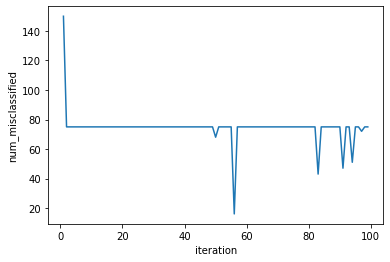

In [10]:
x=[i for i in range(1,100)]
plt.plot(x,arr_mis_100)
plt.xlabel('iteration')
plt.ylabel('num_misclassified')

Text(0, 0.5, 'num_misclassified')

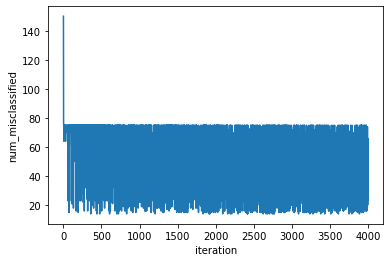

In [11]:

x=[i for i in range(1,4000)]
plt.plot(x,arr_mis_4000)
plt.xlabel('iteration')
plt.ylabel('num_misclassified')

The first plot shows the number of misclassified in the case of 100 iterations. The second plot shows the number of misclassified in the case of 4000 iterations. The plots show how the algorithm keeps going from an error of 0.5 to a low error but it should decrease as the iterations increase. 

I wasn't able to find the error in the code but I thought that was important to highlight this problem.

The fact that one feature has a very larger value of the other is not the cause of the problem, but surely it doesn't help to reach a convergence. So I normalized the dataset.

In [12]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training_norm_1 = scaler.transform(X_training)
print ("Mean of the training input data:", X_training_norm_1.mean(axis=0))
print ("Std of the training input data:",X_training_norm_1.std(axis=0))

X_test_norm_1 = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test_norm_1.mean(axis=0))
print ("Std of the test input data:", X_test_norm_1.std(axis=0))

Mean of the training input data: [ 0. -0. -0.]
Std of the training input data: [1. 1. 1.]
Mean of the test input data: [-0.01531945  0.0006015  -0.06992218]
Std of the test input data: [1.01566481 0.94876864 0.95174373]


In [13]:
# Add a 1 to each sample (homogeneous coordinates)
print(X_training[2])
X_training_norm_1 = np.hstack((np.ones((m_training,1)),X_training_norm_1))
print(X_training[2])
X_test_norm_1 = np.hstack((np.ones((m_test,1)),X_test_norm_1))


print("Training set in homogeneous coordinates:")
print(X_training_norm_1[:10])


[  89.10290948    0.42688473 2141.60876623]
[  89.10290948    0.42688473 2141.60876623]
Training set in homogeneous coordinates:
[[ 1.          3.04991274 -0.55890458 -0.72242113]
 [ 1.         -0.3080616  -1.06037318 -1.56483995]
 [ 1.         -1.28071624  0.46482063  0.20740305]
 [ 1.          0.32818617 -0.87544049 -0.85196467]
 [ 1.         -0.7916099  -0.64631111 -0.9463339 ]
 [ 1.         -0.3080616   0.36181556  1.03443649]
 [ 1.         -0.11617735  0.58153732  1.32637029]
 [ 1.         -1.05427812  0.56194607  0.95250837]
 [ 1.         -0.64385903 -0.98397816 -0.32939724]
 [ 1.         -2.22690408  0.49068304  0.54815436]]


In [14]:
#now run the perceptron for 100 iterations
w_found, error, arr_mis_100, n_100 = perceptron(X_training_norm_1,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))

#now use the w_found to make predictions on test dat
print(w_found)
num_errors = 0

for i in range(X_test_norm_1.shape[0]):
    if (np.dot(w_found,X_test_norm_1[i,:])*Y_test[i] < 0):
        num_errors += 1 
        
        
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))



num iter:1, num_misclassified:54, curr_w:[-1.         -3.04991274  0.55890458  0.72242113]
best_error:0.36, best_w:[-1.         -3.04991274  0.55890458  0.72242113], 

num iter:2, num_misclassified:14, curr_w:[ 0.         -2.46251451  1.79502834  1.67821224]
best_error:0.09333333333333334, best_w:[ 0.         -2.46251451  1.79502834  1.67821224], 

num iter:3, num_misclassified:5, curr_w:[-1.         -0.58739822  2.94270001  2.3165177 ]
best_error:0.03333333333333333, best_w:[-1.         -0.58739822  2.94270001  2.3165177 ], 

num iter:4, num_misclassified:1, curr_w:[ 0.         -0.4925029   3.7044077   1.67597071]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:5, num_misclassified:5, curr_w:[-1.         -1.69552975  3.56548199  1.09680412]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:6, num_misclassified:2, curr_w:[ 0.         -0.81842394  4.27183635  0.34439863]
best_error:

num iter:77, num_misclassified:1, curr_w:[ 1.         -2.80047791  9.03278542  3.48294177]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:78, num_misclassified:1, curr_w:[ 0.         -4.00350476  8.89385971  2.90377518]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:79, num_misclassified:2, curr_w:[ 1.         -3.67531859  8.88147661  3.21681896]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:80, num_misclassified:1, curr_w:[ 0.         -2.62104047  9.19526222  3.85751773]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:81, num_misclassified:3, curr_w:[-1.         -3.82406732  9.05633651  3.27835114]
best_error:0.006666666666666667, best_w:[ 0.         -0.4925029   3.7044077   1.67597071], 

num iter:82, num_misclassified:2, curr_w:[ 0.         -2.94696151  9.76269088  2

In [15]:
#now run the perceptron for 100 iterations
w_found, error, arr_mis_4000,n_4000 = perceptron(X_training_norm_1,Y_training, 4000)
print("Training Error of perpceptron (4000 iterations): " + str(error))

#now use the w_found to make predictions on test dat
print(w_found)
num_errors = 0

for i in range(X_test_h.shape[0]):
    if (np.dot(w_found,X_test_norm_1[i,:])*Y_test[i] < 0):
        num_errors += 1 
        
        
true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

num iter:1, num_misclassified:54, curr_w:[-1.         -3.04991274  0.55890458  0.72242113]
best_error:0.36, best_w:[-1.         -3.04991274  0.55890458  0.72242113], 

num iter:2, num_misclassified:23, curr_w:[-2.         -1.99563462  1.43103354  2.10741775]
best_error:0.15333333333333332, best_w:[-2.         -1.99563462  1.43103354  2.10741775], 

num iter:3, num_misclassified:4, curr_w:[-1.         -0.00108524  2.85810291  3.56184783]
best_error:0.02666666666666667, best_w:[-1.         -0.00108524  2.85810291  3.56184783], 

num iter:4, num_misclassified:1, curr_w:[0.         1.20194161 3.55029535 3.21845895]
best_error:0.006666666666666667, best_w:[0.         1.20194161 3.55029535 3.21845895], 

num iter:5, num_misclassified:4, curr_w:[-1.         -0.00108524  3.41136964  2.63929237]
best_error:0.006666666666666667, best_w:[0.         1.20194161 3.55029535 3.21845895], 

num iter:6, num_misclassified:1, curr_w:[0.         0.32710093 3.39898654 2.95233615]
best_error:0.00666666666666

Text(0, 0.5, 'num_misclassified')

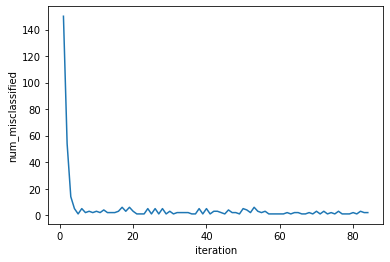

In [16]:
x=[i for i in range(1,n_100)]
plt.plot(x,arr_mis_100)
plt.xlabel('iteration')
plt.ylabel('num_misclassified')

Text(0, 0.5, 'num_misclassified')

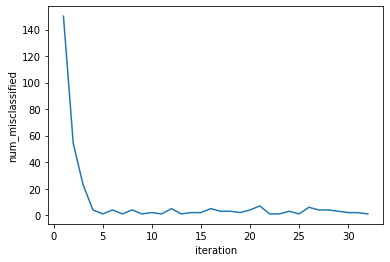

In [17]:
x=[i for i in range(1,n_4000)]
plt.plot(x,arr_mis_4000)
plt.xlabel('iteration')
plt.ylabel('num_misclassified')

What I can observe with normalisation is that both the test and training error are very small compared to the not normalized cases. So the problem highlighted previously disappear but the normalization is not the solution that problem, it is just a way to avoid it. So the reason of the problem is still unknown. Other important things to notice are that with normalisation the perceptron stops before reaching the limit of iterations and that it converges very fastly in the firsts iterations giving very small error already in the first steps of the algorithm.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [5]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [6]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_test needs to be the number of samples in the test set
m_training = int((0.75)*(m))

# m_test needs to be the number of samples in the test set
m_test = int((0.25)*(m))

# X_training = instances for training set
X_training = X[0:(m_training)]
#Y_training = labels for the training set
Y_training = Y[0:(m_training)]

# X_test = instances for test set
X_test = X[m_training:m]
# Y_test = labels for the test set
Y_test = Y[m_training:m]


print(Y_training) # to make sure that Y_training contains both 1 and -1
print(m_test)


print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))
print("\nNumber of classical instances in training:", np.sum(Y_training==-1))
print("Number of metal instances in training:", np.sum(Y_training==1))


print("Shape of training set: " + str(X_training.shape))
print("Shape of label training set: " + str(Y_training.shape))
print("Shape of test set: " + str(X_test.shape))
print("Shape of label test set: " + str(Y_test.shape))



[-1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1
  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1
  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1
  1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1  1 -1
  1  1  1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1
  1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
  1 -1 -1  1  1  1]
50

Number of classical instances in test: 28
Number of metal instances in test: 22

Number of classical instances in training: 72
Number of metal instances in training: 78
Shape of training set: (150, 3)
Shape of label training set: (150,)
Shape of test set: (50, 3)
Shape of label test set: (50,)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [7]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg.fit(X_training, Y_training)

#predict on training set

pred=logreg.predict(X_training)
pred=np.asarray(pred)
#print the error rate = fraction of misclassified samples
error_rate_training = 0
num_errors=0
print(np.size(pred))

for i in range(np.size(pred)):
    if  Y_training[i]!=pred[i]:
        num_errors=num_errors+1


error_rate_training = num_errors/m_training

#for x,y in zip(pred,Y_training):
 #   print(x,y)

print("Error rate on training set: "+str(error_rate_training))

#predict on test set

pred=logreg.predict(X_test)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_test = 0
num_errors=0
print(np.size(pred))
for i in range(np.size(pred)):
    if Y_test[i]!=pred[i]:
        num_errors=num_errors+1

error_rate_test = num_errors/m_test

print("Error rate on training set: "+str(error_rate_training))

print("Error rate on test set: " + str(error_rate_test))


150
Error rate on training set: 0.006666666666666667
50
Error rate on training set: 0.006666666666666667
Error rate on test set: 0.0


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

### Tempo and chroma_stft

In [8]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 0
index_feature2 = 1 # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

m_training = int((0.75)*(X_reduced.shape[0]))
m_test = int((0.25)*(X_reduced.shape[0]))

print(m_training )
print(m_test)

X_training = X_reduced[:(m_training)]
Y_training = Y[:(m_training)]

print(X_training.shape)
print(Y_training.shape)

X_test = X_reduced[-(m_test):]
Y_test = Y[-(m_test):]

print(X_test.shape)
print(Y_test.shape)

print(X_training)



150
50
(150, 2)
(150,)
(50, 2)
(50,)
[[1.03359375e+02 2.94134905e-01]
 [1.07666016e+02 2.39282395e-01]
 [1.61499023e+02 3.87949211e-01]
 [7.17773438e+01 2.34236042e-01]
 [1.72265625e+02 4.85037105e-01]
 [1.72265625e+02 4.43969441e-01]
 [1.29199219e+02 4.87653545e-01]
 [1.17453835e+02 4.69570902e-01]
 [1.61499023e+02 4.06924980e-01]
 [1.07666016e+02 5.80973799e-01]
 [9.22851562e+01 3.80150944e-01]
 [9.57031250e+01 1.81161139e-01]
 [1.03359375e+02 2.83133883e-01]
 [8.91029095e+01 4.26884734e-01]
 [1.17453835e+02 4.82569238e-01]
 [1.17453835e+02 5.01569949e-01]
 [1.61499023e+02 2.45645579e-01]
 [1.23046875e+02 2.74433506e-01]
 [1.51999081e+02 2.53349534e-01]
 [1.72265625e+02 4.99052294e-01]
 [1.61499023e+02 5.10892566e-01]
 [1.17453835e+02 3.41978329e-01]
 [1.07666016e+02 4.63511012e-01]
 [1.29199219e+02 4.74766098e-01]
 [1.61499023e+02 4.97086151e-01]
 [1.17453835e+02 4.57425500e-01]
 [1.07666016e+02 5.16928362e-01]
 [1.72265625e+02 6.05022295e-01]
 [9.93840144e+01 2.17319909e-01]
 [1.23

Now learn a model using the training data and measure the performances.

In [9]:
# learning from training data

logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg.fit(X_training, Y_training)
pred=logreg.predict(X_training)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_training = 0
num_errors=0
print(np.size(pred))

for i in range(np.size(pred)):
    if  Y_training[i]!=pred[i]:
        num_errors=num_errors+1


error_rate_training = num_errors/m_training

print("Error rate on training set: " + str(error_rate_training))

#predict on test set

pred=logreg.predict(X_test)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_test = 0
num_errors=0
print(np.size(pred))
for i in range(np.size(pred)):
    if Y_test[i]!=pred[i]:
        num_errors=num_errors+1

error_rate_test = num_errors/m_test

print("Error rate on test set: " + str(error_rate_test))

150
Error rate on training set: 0.006666666666666667
50
Error rate on test set: 0.04


(15, 1744)


<ipython-input-10-ff771ca567b0>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


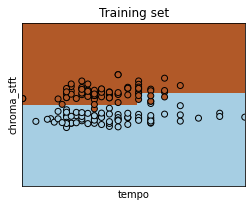

<ipython-input-10-ff771ca567b0>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


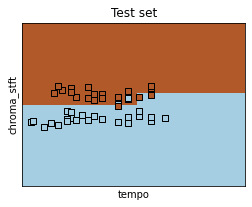

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .1  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(xx.shape)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set') 

plt.show()

### Tempo and spectral_centroid

In [24]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 0
index_feature2 = 2 # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

m_training = int((0.75)*(X_reduced.shape[0]))
m_test = int((0.25)*(X_reduced.shape[0]))

print(m_training )
print(m_test)

X_training = X_reduced[:(m_training)]
Y_training = Y[:(m_training)]

print(X_training.shape)
print(Y_training.shape)

X_test = X_reduced[-(m_test):]
Y_test = Y[-(m_test):]

print(X_test.shape)
print(Y_test.shape)

print(X_training)



150
50
(150, 2)
(150,)
(50, 2)
(50,)
[[ 123.046875   3114.23160954]
 [ 151.99908088 1016.2794102 ]
 [ 234.90767045 1216.2937624 ]
 [ 184.5703125  3048.39149511]
 [ 129.19921875 1878.64457434]
 [  95.703125   1505.2990118 ]
 [ 117.45383523 2964.60663072]
 [ 117.45383523 2502.47277691]
 [ 123.046875   1173.65830805]
 [  95.703125   3274.34215699]
 [ 117.45383523 1243.71802052]
 [ 172.265625   2803.25735466]
 [ 103.359375   2224.87016395]
 [ 151.99908088 2138.0765907 ]
 [ 143.5546875  1218.29050795]
 [ 135.99917763  901.83448053]
 [ 135.99917763 3047.82371283]
 [ 172.265625   2986.70516179]
 [ 117.45383523 1284.92177494]
 [ 112.34714674 2987.1640044 ]
 [ 135.99917763 1623.85938811]
 [ 107.66601562 2656.26118587]
 [ 135.99917763  794.9184861 ]
 [ 161.49902344 2848.06867728]
 [ 135.99917763 2218.42602198]
 [ 103.359375   2646.94734397]
 [ 135.99917763 2384.67428279]
 [ 112.34714674 2699.57385165]
 [  99.38401442 2751.9089641 ]
 [  95.703125   1179.90865427]
 [ 129.19921875 2718.5579418 ]
 [

In [25]:
# learning from training data

logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg.fit(X_training, Y_training)
pred=logreg.predict(X_training)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_training = 0
num_errors=0
print(np.size(pred))

for i in range(np.size(pred)):
    if  Y_training[i]!=pred[i]:
        num_errors=num_errors+1


error_rate_training = num_errors/m_training

print("Error rate on training set: " + str(error_rate_training))

#predict on test set

pred=logreg.predict(X_test)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_test = 0
num_errors=0
print(np.size(pred))
for i in range(np.size(pred)):
    if Y_test[i]!=pred[i]:
        num_errors=num_errors+1

error_rate_test = num_errors/m_test

print("Error rate on test set: " + str(error_rate_test))

150
Error rate on training set: 0.04666666666666667
50
Error rate on test set: 0.08


<ipython-input-26-62b295b11dac>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


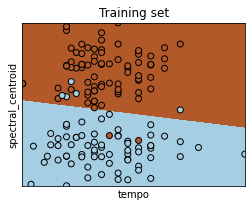

<ipython-input-26-62b295b11dac>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


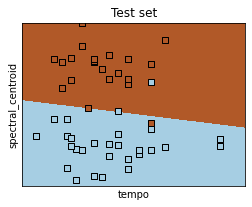

In [26]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .1  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

### chroma_stft and spectral_centroid

In [27]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 1
index_feature2 = 2 # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

m_training = int((0.75)*(X_reduced.shape[0]))
m_test = int((0.25)*(X_reduced.shape[0]))

print(m_training )
print(m_test)

X_training = X_reduced[:(m_training)]
Y_training = Y[:(m_training)]

print(X_training.shape)
print(Y_training.shape)

X_test = X_reduced[-(m_test):]
Y_test = Y[-(m_test):]

print(X_test.shape)
print(Y_test.shape)

print(X_training)



150
50
(150, 2)
(150,)
(50, 2)
(50,)
[[   0.51022232 3114.23160954]
 [   0.31926286 1016.2794102 ]
 [   0.27047824 1216.2937624 ]
 [   0.54184712 3048.39149511]
 [   0.34679752 1878.64457434]
 [   0.25239108 1505.2990118 ]
 [   0.46658794 2964.60663072]
 [   0.43643412 2502.47277691]
 [   0.25857229 1173.65830805]
 [   0.48779988 3274.34215699]
 [   0.27834892 1243.71802052]
 [   0.60502229 2803.25735466]
 [   0.31158687 2224.87016395]
 [   0.51766229 2138.0765907 ]
 [   0.26906454 1218.29050795]
 [   0.2407049   901.83448053]
 [   0.6362045  3047.82371283]
 [   0.48503711 2986.70516179]
 [   0.27942064 1284.92177494]
 [   0.50242919 2987.1640044 ]
 [   0.22694791 1623.85938811]
 [   0.5809738  2656.26118587]
 [   0.18703243  794.9184861 ]
 [   0.49708615 2848.06867728]
 [   0.36987195 2218.42602198]
 [   0.44098776 2646.94734397]
 [   0.46547753 2384.67428279]
 [   0.55523317 2699.57385165]
 [   0.48713205 2751.9089641 ]
 [   0.23565796 1179.90865427]
 [   0.48765355 2718.5579418 ]
 [

In [28]:
# learning from training data

logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

logreg.fit(X_training, Y_training)
pred=logreg.predict(X_training)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_training = 0
num_errors=0
print(np.size(pred))

for i in range(np.size(pred)):
    if  Y_training[i]!=pred[i]:
        num_errors=num_errors+1


error_rate_training = num_errors/m_training

print("Error rate on training set: " + str(error_rate_training))

#predict on test set

pred=logreg.predict(X_test)
pred=np.asarray(pred)

#print the error rate = fraction of misclassified samples

error_rate_test = 0
num_errors=0
print(np.size(pred))
for i in range(np.size(pred)):
    if Y_test[i]!=pred[i]:
        num_errors=num_errors+1

error_rate_test = num_errors/m_test

print("Error rate on test set: " + str(error_rate_test))

150
Error rate on training set: 0.0
50
Error rate on test set: 0.02


<ipython-input-29-62b295b11dac>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


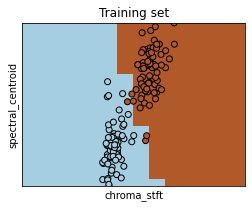

<ipython-input-29-62b295b11dac>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


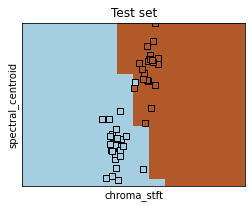

In [29]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .1  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

The performances are the following:
 
 | | Features   | Training error   | Test error  |
|---:|:-------------|:-----------|:------|
| 1 | tempo and chroma_stft | 0.013333333334  | 0.04       | 
| 2 | tempo and spectral_centroid  | 0.046666666667   | 0.08   |
| 3 | chroma_stft and spectral_centroid  | 0.0   | 0.02   |
| 4 | all the three features  | 0.0   | 0.02   |



Looking at the values of the training and test error we can say that the worst couple is **tempo and spectral_centroid**, the best is **chroma_stft and spectral_centroid**. The third couple has the same perfomance of the case with 3 features in both the training error and test error. The second couple is worst in both the training error and test error. We can notice thw facts:
1. the two couples with the feature **tempo** are the worst 
2. the couple without the feature **tempo** is the best and it gives the same error of the three feature case

Thus it is possible to hypothesize that the feature that is least useful feature to classify the samples is the feature **tempo**



If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [30]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [31]:
#Import Data: Load the data from a .csv file
filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))

#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([  0.00632,   0.     ,   0.46   ,   0.     ,   0.385  ,   3.561  ,
         2.9    ,   1.1296 ,   1.     , 187.     ,  12.6    ,   0.32   ,
         1.73   ,  50.     ]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([  3.65578576,  11.5       ,  11.13174   ,   0.07      ,
         0.5544514 ,   6.28297   ,  68.4246    ,   3.8119318 ,
         9.642     , 409.624     ,  18.4286    , 356.20804   ,
        12.69874   , 225.68      ]), variance=array([   74.72521949,   548.90581162,    47.61982282,     0.06523046,
           0.01358383,     0.49761833,   799.31416317,     4.46304043,
          75.96175952, 28560.51966333,     4.67663531,  8416.5713729 ,
          51.3361942 ,  8529.82925852]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0.40691344, -0.58266003,  0.99061328,  0.98

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [32]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)

print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(Data)
X = Data[:,:-1].astype(float) 
Y = Data[:,-1].astype(float)
#training data 
X_training = X[:(m_t)]
Y_training = Y[:(m_t)]
print ("Training input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test = X[(m_t):]
Y_test = Y[(m_t):]
print ("Test input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)


Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350,)
Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [33]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0. -0.  0.  0. -0. -0. -0.  0.  0. -0.  0.  0.  0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [ 0.05567898 -0.05920683 -0.07905576 -0.0544767   0.04378464 -0.14069791
  0.01934169  0.0700288  -0.02860444 -0.11155493  0.02259543 -0.08128858
  0.13143763]
Std of the test input data: [1.29351915 0.87138848 0.98983797 0.90562503 1.08196975 1.01058707
 1.00857326 1.05130779 0.98067515 1.00569458 1.00994174 1.07697042
 1.08039685]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [34]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test = X_test.shape[0]
X_testH = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH,Y_training,rcond=None)
print("LS coefficients with numpy lstsq:", w_np)


# compute Residual sums of squares 
RSStr_hand =sum((Y_training-np.dot(X_trainingH,w_np))**2)
print(RSStr_hand)
print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

LS coefficients with numpy lstsq: [229.22        -3.50159247  11.14086969   3.84860673   9.17607022
 -18.25848135  33.68014041  -1.06456865 -29.06133718  21.43719699
 -20.48826309 -18.46206402  12.55576408 -34.19756029]
754788.657296337
RSS with numpy lstsq:  [754788.65729634]
Empirical risk with numpy lstsq: [2156.53902085]


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [35]:
#compute predictions on training and test
prediction_training = np.dot(X_trainingH,w_np)
prediction_test = np.dot(X_testH,w_np)

#what about the loss for points in the test data?
RSS_test = sum((Y_test-np.dot(X_testH,w_np))**2)

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on test data: 365010.76043688104
Loss estimated from test data: 2433.405069579207


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The Loss estimated from training data is 2156.53902085. In the test set the loss is instead 2433.405069579207. So the test loss is higher than the training loss. This is what we normaly expect by any algorithm because by definition it tries to find the best parameters for the training set and the test set is a way to verify how general the solution found is. The values calculated should be correct because we get the same results from both the methods used.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [36]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()

LinReg.fit(X_training, Y_training)


print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets

pred_training=LinReg.predict(X_training)

pred_test=LinReg.predict(X_test)

RSS_training = (np.linalg.norm(pred_training-Y_training))**2

print("RSS on training data:",  RSS_training)
print("Loss estimated from training data:", RSS_training/m_training)

RSS_test = (np.linalg.norm(pred_test-Y_test))**2

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))
print("Measure on test data:", 1-LinReg.score(X_test, Y_test))

Intercept: 229.22000000000054
Least-Squares Coefficients: [ -3.50159247  11.14086969   3.84860673   9.17607022 -18.25848135
  33.68014041  -1.06456865 -29.06133718  21.43719699 -20.48826309
 -18.46206402  12.55576408 -34.19756029]
RSS on training data: 754788.6572963366
Loss estimated from training data: 2156.539020846676
RSS on test data: 365010.76043687994
Loss estimated from test data: 2433.4050695792
Measure on training data: 0.24295464157826918
Measure on test data: 0.3215787975454376
